In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import OrderedDict

In [2]:
pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

%matplotlib inline

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta

mag_cost = 3
rev_goal = 1_000_000
customer_count = 0
new_customers = 0
start_date = date(2020, 12, 31)
delta_period = 11

revenue_total = 0
end_date = start_date + relativedelta(months=delta_period)

while revenue_total <= rev_goal:
    counter = 0
    revenue = 0
    customer_count += 1
    cal_month_range = 13
    revenue_total = 0
    for cohort in range(11):

        churn_rate = 0.17
        churn_rate_decrease = 0.05
        monthly_customers = customer_count
        cal_month_range -= 1
        for cal_month in range(cal_month_range):
            month = start_date + relativedelta(months=cal_month)
            revenue = monthly_customers * mag_cost
            revenue_total += revenue
            customers_churned = monthly_customers * churn_rate
            monthly_customers -= customers_churned
            churn_rate = churn_rate - (churn_rate * churn_rate_decrease)
    
print(customer_count,
      "customers are needed monthly to reach the goal of",
      round(revenue_total),
      "of cumulative revenue by 2021-12-31",
      )            

7253 customers are needed monthly to reach the goal of 1000090 of cumulative revenue by 2021-12-31


In [5]:
# start, end = end_date, start_date
# OrderedDict(((start + timedelta(_)).strftime("%Y-%m-%d"), None) for _ in range((end - start).days)).keys()

In [6]:
mag_cost = 3
rows = []
cols = []
data = []
months = []

cal_month_range = 13
revenue_total = 0
for cohort in range(1,13):

    churn_rate = 0.17
    churn_rate_decrease = 0.05
    monthly_customers = customer_count
    
    for cal_month in range(1,cal_month_range):
        month = start_date + relativedelta(months=cal_month)
        data.append(round(monthly_customers))
        rows.append(round(cohort))
        cols.append(month.strftime("%Y-%m-01"))
        #cols.append(month.strftime(r"%b-%y")) 
        revenue = monthly_customers * mag_cost
        revenue_total += revenue
        customers_churned = monthly_customers * churn_rate
        monthly_customers -= customers_churned
        churn_rate = churn_rate - (churn_rate * churn_rate_decrease)
        
    cal_month_range -= 1

In [7]:
# cols = np.asarray(cols)
# rows = np.asarray(rows)
# data = np.asarray(data)

In [8]:
#stacked_cohorts = np.column_stack((np.asarray(cols), np.asarray(rows), np.asarray(data)))
df = pd.DataFrame(
    {'cal_month': cols,
     'cohort': rows,
     'monthly_customers': data
    })
df.head(5)

,cal_month,cohort,monthly_customers
0,2021-01-01,1,7253
1,2021-02-01,1,6020
2,2021-03-01,1,5048
3,2021-04-01,1,4273
4,2021-05-01,1,3650


In [9]:
df_pivot = pd.pivot_table(df, values= 'monthly_customers', 
                      index =  'cal_month' ,
                     columns = 'cohort')

In [10]:
df_pivot.head()

cohort,1,2,3,4,5,6,7,8,9,10,11,12
cal_month,,,,,,,,,,,,
2021-01-01,7253.0,7253.0,7253.0,7253.0,7253.0,7253.0,7253.0,7253.0,7253.0,7253.0,7253.0,7253.0
2021-02-01,6020.0,6020.0,6020.0,6020.0,6020.0,6020.0,6020.0,6020.0,6020.0,6020.0,6020.0,NaN
2021-03-01,5048.0,5048.0,5048.0,5048.0,5048.0,5048.0,5048.0,5048.0,5048.0,5048.0,NaN,NaN
2021-04-01,4273.0,4273.0,4273.0,4273.0,4273.0,4273.0,4273.0,4273.0,4273.0,NaN,NaN,NaN
2021-05-01,3650.0,3650.0,3650.0,3650.0,3650.0,3650.0,3650.0,3650.0,NaN,NaN,NaN,NaN


Text(120.5, 0.5, 'Cohort Month')

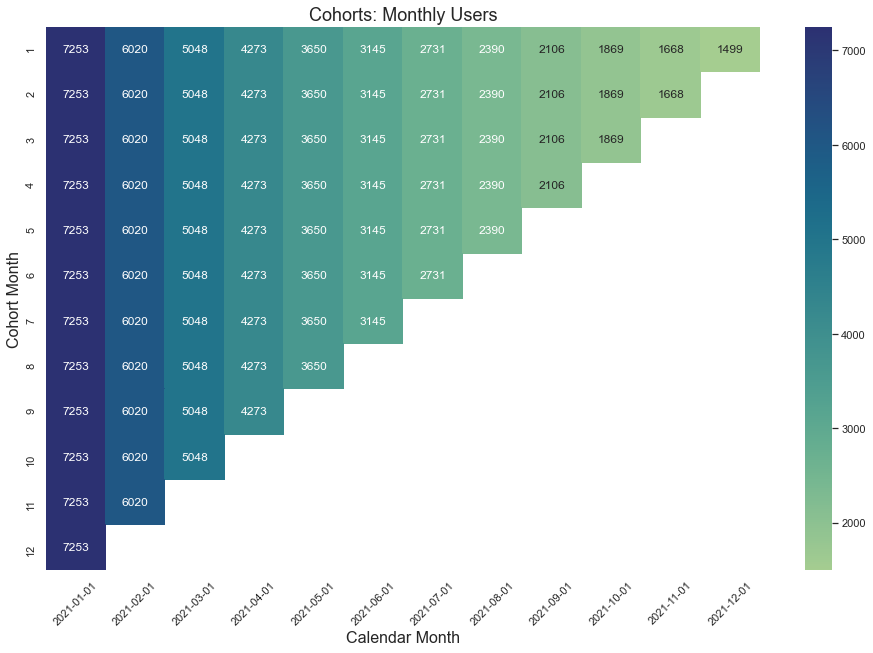

In [11]:
import seaborn as sns
sns.set(style='white')

diverging_colors = sns.color_palette("crest", as_cmap=True)

plt.figure(figsize=(16,10))
plt.title('Cohorts: Monthly Users', fontsize=18)

plotsky = sns.heatmap(df_pivot.T, cmap=diverging_colors, mask=df_pivot.T.isnull(), annot=True, fmt='g')

for item in plotsky.get_xticklabels():
    item.set_rotation(45)
plt.xlabel('Calendar Month', fontsize=16)
plt.ylabel('Cohort Month', fontsize=16)